## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Pressing Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics wth CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells include (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of execution of the encoded operation is
- a comment placed on a separate line states either the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

The code is written by Lydia Novozhilova. Senan Hayes contributed to writing text cells and proofreading, editing, and fruitful discussion of this document.


# Lab 4: Plotting legs of primitive Pythagorean triples (PPTs)
## Problem formulation
It is known that legs $a,\,b$ of any PPT are coprime numbers that can be defined as
$$
a=n^2-m^2,\ b=2mn
$$
with even $n$  and certain odd $m < n$. Geometrically, pairs $(a,b)$ are images of points $x=n,\, y=m$ in $xy$-plane under the mapping
$$(x,y)\mapsto (x^2-y^2,2xy).$$

Do the following:
- Make a function that takes an integer $N$ and
returns a figure of all PPTs defined by even values $n\le 2N$ and admissible $m$-values. Plot corresponding points $(a,b).$
-There are some patterns in the points distribution. In fact, at least three types of curves passing through points depicting Pythagorean legs can be found: Images of vertical lines $x=n,$ images of horizontal lines $y=m,$ and images of lines with slope one passing through some point with integer coordinates $(n,m),\,m < n$ of different parity with $n$ being even. Manually derive the explicit equations of these curves and make a figure including two particular curves of each type.

For more details related to Pythagorean triples read Section 4.3. A slightly different version of this lab can be found in Section 4.4.

### Comment
There is only one help function **make_PPT** in this JN. List comprehension operators for constructing *nlist* and *mlist* in this function body might look tricky. Manual experimentation with concrete data would clarify how the operators work.

In [ ]:
import matplotlib.pyplot as plt
import math


# Help function: Finding all PPTs with n<=2N
def makePPT(N):
  """
  Args:
    N: positive integer
  Output:
    List of all PPTs with n<=2N
  """
  # list comprehension of even values from 2 to 2N.
  nlist=[2*k+2 for k in range(?)] # fill in the blank

  # constructing list of PPT legs
  S = []
  for k in range(N):
    n=nlist[k]
    # Finding admissible m-values for given n
    # list comprehension of all odd m<n
    mlist=[? for l in range(n//2)] # fill in the blank
    for m in mlist:
      # verifying that a,b are coprime
      a,b = [n**2-m**2,2*n*m]
      if math.gcd(a,b)==?: # fill in the blank
        S.append([a,b])
  return S



In [ ]:
# Example
makePPT(4)


[[3, 4],
 [15, 8],
 [7, 24],
 [35, 12],
 [11, 60],
 [63, 16],
 [55, 48],
 [39, 80],
 [15, 112]]

In [ ]:
# Main function
def plot_PPT(N,tlt,fig_size,c):
  '''
  Args:
    N: positive integer
    ttl: title (string)
    fig_size: 2-tuple
    c: point marker color (string)
  Output:
    Plot of all PPT legs defined by even values n<=2N and acceptable m<n
  '''
  fig = plt.figure(figsize = fig_size)
  plt.title(tlt)
  L=makePPT(N) # list of PPT legs [a,b]
  # split list L of [a,b] pairs into a-list and b-list
  a,b =[? for p in ?],[? for p in ?] # fill in the blanks
  # plot PPT legs
  plt.scatter(a, b, color=c,s=8) # s specifies marker size


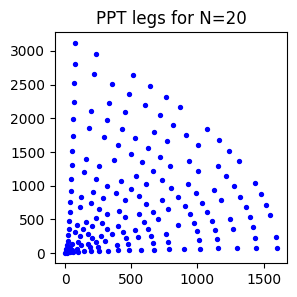

In [ ]:
# Example (N=20)

plot_PPT(20,'PPT legs for N=20',(3,3),'blue')

# Exploration of the mapping $(n,m)\mapsto (n^2-m^2,2mn)$
## Suggested directions for the second task of the lab
The goal of the task is to derive explicit equations of continuous objects -- curves. Consider a continuous version of this mapping $(x,y) \mapsto (u,v)$ with
$$u=x^2-y^2,\qquad v=2xy.\qquad     (*)$$ Notice that this mapping can be writtern in the complex form  as $z\mapsto w$ with $z=x+iy, w=z^2\equiv u+iv.$

Vertical lines $x=n$ in $xy$-plane are mapped to curves of one type. Horizontal lines $y=m$ are mapped to curves of another type. Slanted lines passing through a point $(n,n-k)$ with fixed odd $k < n$ and slope one are mapped to curves of the third type. The formula (*) gives parametric equations of these lines in $uv$-plane with parameters $y$ for curves of the first type and $x$ for curves of the second and third types. Excluding parameters, one will obtain required explicit equations.

The code in the next cell produces a figure with one curve of each type superimposed on a certain PPT figure. Manually derive explicit equations for a second triple of the curves and modify the code to complete the task.

### Comment
Note that at the intersection point the red and blue curves in the figure produced by the code in the next cell look perpendicular, that is, have perpendicular tangent lines. In fact, this is true. It is known from complex analysis that "nice" complex functions (and $z\mapsto z^2$ is nice in that sense) preserve angles between curves. In the setting of this part of the lab, the red and blue curves are images of lines $x=const,\ y=const,$ and the two lines are obviously perpendicular.   


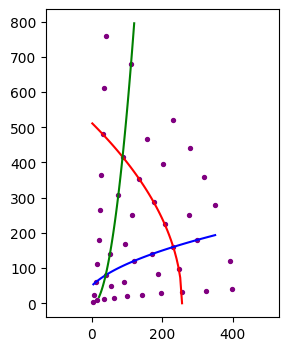

In [ ]:
# Three specific curves showing patterns in Pythagorean triples. Ranges for
# independent variable u are adjusted for rendering a better figure.
import numpy as np

fig = plt.figure(figsize = (3,4))
plt.axis('equal')

u = np.linspace(1,256, 50)
# equation for a curve of type 1
# x=n for specific n-value; y is excluded from parametric equations (*) of the curve
v1 = 32*(256-u)**0.5
plt.plot(u,v1,color='red')

u = np.linspace(4,350, 50)
# equation for a curve of type 2
# y=m for specific m-value, x is excluded from parametric equations (*) of the curve
v2 = 10*(25+u)**0.5
plt.plot(u,v2,color='blue')

u = np.linspace(20,120,50)
# equation for a curve of type 3
# y=x-k for specific odd k-value; x is excluded from parametric equations (*) of the curve
v3 = (u**2-81)/18
plt.plot(u,v3,color='green')

L=makePPT(10)
u,v =[p[0] for p in L],[p[1] for p in L]
plt.scatter(u,v,color='purple',s=8)
plt.show()